# Music Lyrics Classification
This study will examine lyrics and try to classify them into one of four genres:  Rock, Country, R&B or Rap/Hip-hop
Robert Seibel
Minh Nhat Mai
Gurmat Sour

## Examine and clean up the lyrics data set



Start by importing the libraries, then loading the data into a pandas dataframe

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
lyrics_raw=pd.read_csv('rock_country_hiphop_rb.csv')
lyrics_raw.head(20)

,song,artist,type,lyrics
0,Stairway to Heaven,Led Zeppelin,rock,Stairway to Heaven Lyrics[Intro]\n\n[Verse 1]\...
1,Hey Jude,Beatles,rock,Hey Jude Lyrics[Verse 1: Paul McCartney]\nHey ...
2,All Along the Watchtower,"Hendrix, Jimi",rock,"Ii. Tambourine Lyrics[Chorus, sung]\nHey, Pip,..."
3,Satisfaction,Rolling Stones,rock,"Sin título I Lyrics[Letra de ""Sin título I""]\n..."
4,Like A Rolling Stone,"Dylan, Bob",rock,Like a Rolling Stone Lyrics[Verse 1]\nOnce upo...
5,Another Brick In The Wall,Pink Floyd,rock,"Another Brick in the Wall, Pt. 2 Lyrics[Intro]..."
6,Won't Get Fooled Again,Who,rock,Won’t Get Fooled Again Lyrics[Verse 1]\nWe'll ...
7,Hotel California,Eagles,rock,Hotel California Lyrics[Verse 1]\nOn a dark de...
8,Layla,Derek And The Dominos,rock,Layla Lyrics[Opening Instrumental Riff]\n\n[Ve...
9,Sweet Home Alabama,Lynyrd Skynyrd,rock,"Sweet Home Alabama Lyrics[Intro]\nOne, two, th..."


In [3]:
#do we have any null columns?
lyrics_raw['lyrics'].isna().sum()

104

In [4]:
#We have 104 Null lyric columns.  Lets drop them - nothing can be done with them
#then let's check the balance of values
lyrics_raw.dropna(inplace=True)
lyrics_raw.type.value_counts()

type
country          987
rock             984
R&B              973
rap & hip hop    952
Name: count, dtype: int64

In [5]:
lyrics_raw.shape[0]

3896

In [6]:
# fairly well balanced data set - good
# now let's look at the lyrics themselves...

# it seems that most of the lyrics have the title already in the lyrics column as well (right before something in [square brackets])
# for all of those, let's remove everything before and including the first square brackets
lyrics_raw['lyrics1'] = lyrics_raw['lyrics'].str.extract(r'\[.*?\]([\s\S]*)', expand=False)

#there are some rows that don't seem to have any [square bracket comments]  we'll just leave those as is for now
lyrics_raw['lyrics1'] = lyrics_raw['lyrics1'].fillna(lyrics_raw['lyrics'])

In [7]:
lyrics_raw.tail(10)

,song,artist,type,lyrics,lyrics1
3990,Lil’ Ghetto Boy,Do Or Die,rap & hip hop,Lil’ Ghetto Boy Lyrics(Johnny P)\nOhh yeaahhh\...,Lil’ Ghetto Boy Lyrics(Johnny P)\nOhh yeaahhh\...
3991,Baby Got Back,Sir-Mix-A-Lot,rap & hip hop,"Baby Got Back Lyrics[Intro: Girls]\n""Oh, my, g...","\n""Oh, my, god, Becky, look at her butt. It is..."
3992,Georgia Nights,Dolla,rap & hip hop,Georgia Nights Lyrics[Chorus]: A rainy night i...,: A rainy night in Georgia x2 Oh it’s a rainy ...
3993,Let It Be,Dyme Def,rap & hip hop,Let It Be Lyrics(When I find myself in times o...,\nA victim of a man\nThat substitutes his mout...
3994,Life As A Shorty,Fashawn,rap & hip hop,Life as a Shorty Lyrics[Verse 1-Fashawn]\nReme...,"\nRemember, livin' in a trailer\nCookin' dinne..."
3995,Motown 25,Elzhi,rap & hip hop,Motown 25 Lyrics[Verse 1: eLZhi]\nI end career...,"\nI end careers, years, pierce ears fierce wit..."
3996,How Ya Like Me Now,Kool Moe Dee,rap & hip hop,"How Ya Like Me Now Lyrics""All aboard for the n...","\nI throw my tape on then, I watch ya\nThree s..."
3997,Coastin’,Zion I feat. K.Flay,rap & hip hop,Coastin’ LyricsWhen life brings trouble\nYou c...,Coastin’ LyricsWhen life brings trouble\nYou c...
3998,Head Banger,EPMD,rap & hip hop,Headbanger Lyrics[Redman]\nNegroes!!!!!!!!\n\n...,"\nNegroes!!!!!!!!\n\n[Hook]\nThe head banger, ..."
3999,Sound Bwoy Burell,Smif-N-Wessun,rap & hip hop,Sound Bwoy Bureill Lyrics[Intro: Sample from C...,\n“We are the winning champion sound. You can...


In [8]:
# next we can find how many rows still have the title in the lyrics (the ones that didn't have square brackets)
lyrics_raw['title_start']=lyrics_raw.apply(lambda row: row['lyrics1'].startswith(row['song']),axis=1)
lyrics_raw[lyrics_raw['title_start']==True]

,song,artist,type,lyrics,lyrics1,title_start
32,The Joker,"Miller, Steve",rock,The Joker LyricsSome people call me the space ...,The Joker LyricsSome people call me the space ...,True
61,Who Do You Love,"Thorogood, George",rock,Who Do You Love? LyricsI walked forty-seven mi...,Who Do You Love? LyricsI walked forty-seven mi...,True
80,All Right Now,Free,rock,"All Right Now LyricsOh, whoa, whoa\nOw\nMm!\n\...","All Right Now LyricsOh, whoa, whoa\nOw\nMm!\n\...",True
93,House of the Rising Sun,Animals,rock,House of the Rising Sun LyricsThere is a house...,House of the Rising Sun LyricsThere is a house...,True
100,Do You Feel Like We Do,"Frampton, Peter",rock,Do You Feel Like We Do LyricsWoke up this morn...,Do You Feel Like We Do LyricsWoke up this morn...,True
...,...,...,...,...,...,...
3906,I Can’t Quit,Devin The Dude,rap & hip hop,I Can’t Quit Lyrics(2 guys talking about Devin...,I Can’t Quit Lyrics(2 guys talking about Devin...,True
3919,Knockin’ Boots,Candyman,rap & hip hop,Knockin’ Boots Lyrics(Tone Loc)\nAttention all...,Knockin’ Boots Lyrics(Tone Loc)\nAttention all...,True
3952,Broken Heart,Pharoahe Monch,rap & hip hop,"Broken Heart Lyrics""A broken heart""\n\nHer apa...","Broken Heart Lyrics""A broken heart""\n\nHer apa...",True
3990,Lil’ Ghetto Boy,Do Or Die,rap & hip hop,Lil’ Ghetto Boy Lyrics(Johnny P)\nOhh yeaahhh\...,Lil’ Ghetto Boy Lyrics(Johnny P)\nOhh yeaahhh\...,True


In [9]:
#remove the title from the lyrics for those rows
lyrics_raw['lyrics2'] = lyrics_raw['lyrics1']
lyrics_raw.loc[lyrics_raw['title_start'], 'lyrics2'] = lyrics_raw.apply(
    lambda row: row['lyrics1'].replace(row['song'] + ' Lyrics', '', 1).strip(),
    axis=1
)

In [10]:
#lets see what we have now
lyrics_raw[lyrics_raw['title_start']==True]

,song,artist,type,lyrics,lyrics1,title_start,lyrics2
32,The Joker,"Miller, Steve",rock,The Joker LyricsSome people call me the space ...,The Joker LyricsSome people call me the space ...,True,"Some people call me the space cowboy, yeah\nSo..."
61,Who Do You Love,"Thorogood, George",rock,Who Do You Love? LyricsI walked forty-seven mi...,Who Do You Love? LyricsI walked forty-seven mi...,True,Who Do You Love? LyricsI walked forty-seven mi...
80,All Right Now,Free,rock,"All Right Now LyricsOh, whoa, whoa\nOw\nMm!\n\...","All Right Now LyricsOh, whoa, whoa\nOw\nMm!\n\...",True,"Oh, whoa, whoa\nOw\nMm!\n\nThere she stood in ..."
93,House of the Rising Sun,Animals,rock,House of the Rising Sun LyricsThere is a house...,House of the Rising Sun LyricsThere is a house...,True,There is a house in New Orleans\nThey call the...
100,Do You Feel Like We Do,"Frampton, Peter",rock,Do You Feel Like We Do LyricsWoke up this morn...,Do You Feel Like We Do LyricsWoke up this morn...,True,Woke up this morning with a wine glass in my h...
...,...,...,...,...,...,...,...
3906,I Can’t Quit,Devin The Dude,rap & hip hop,I Can’t Quit Lyrics(2 guys talking about Devin...,I Can’t Quit Lyrics(2 guys talking about Devin...,True,(2 guys talking about Devin)\n\nMan. They got ...
3919,Knockin’ Boots,Candyman,rap & hip hop,Knockin’ Boots Lyrics(Tone Loc)\nAttention all...,Knockin’ Boots Lyrics(Tone Loc)\nAttention all...,True,(Tone Loc)\nAttention all ladies\nThe Candyman...
3952,Broken Heart,Pharoahe Monch,rap & hip hop,"Broken Heart Lyrics""A broken heart""\n\nHer apa...","Broken Heart Lyrics""A broken heart""\n\nHer apa...",True,"""A broken heart""\n\nHer apartment was wallpape..."
3990,Lil’ Ghetto Boy,Do Or Die,rap & hip hop,Lil’ Ghetto Boy Lyrics(Johnny P)\nOhh yeaahhh\...,Lil’ Ghetto Boy Lyrics(Johnny P)\nOhh yeaahhh\...,True,(Johnny P)\nOhh yeaahhh\nWhoaaa-ho-ohhhhhhh\n\...


In [11]:
# looks a bit better.  Now lets tackle all the rest of the stuff in [square brackets] and (round brackets) - they aren't part of the song.  While we're at it, let's remove all the line breaks '\n'

#let's drop lyrics, lyrics1 and title_start columns - not needed any more
lyrics_raw.drop(columns=['lyrics','lyrics1','title_start'],inplace=True)

In [12]:
lyrics_raw['lyrics3'] = lyrics_raw['lyrics2'].str.replace(r'\(.*?\)', '', regex=True)
lyrics_raw['lyrics4'] = lyrics_raw['lyrics3'].str.replace(r'\[.*?\]', '', regex=True)
lyrics_raw.tail(20)

,song,artist,type,lyrics2,lyrics3,lyrics4
3980,Ghetto Cowboy,Mo’ Thugs feat. Layzie & Krayzie Bone,rap & hip hop,\nYou betta count your money\nYou betta count ...,\nYou betta count your money\nYou betta count ...,\nYou betta count your money\nYou betta count ...
3981,History,Mos Def feat. Talib Kweli,rap & hip hop,"\nKweli say, ""Everybody act according to the s...","\nKweli say, ""Everybody act according to the s...","\nKweli say, ""Everybody act according to the s..."
3982,Dream Big,Crooked I feat. Akon,rap & hip hop,"\nSee, I remember I was just a loner\nLooook a...","\nSee, I remember I was just a loner\nLooook a...","\nSee, I remember I was just a loner\nLooook a..."
3983,Oh Really,KRS One & Buckshot feat. Talib Kweli,rap & hip hop,\n[Scratch] Oh Really?\nOh Really? You think y...,\n[Scratch] Oh Really?\nOh Really? You think y...,\n Oh Really?\nOh Really? You think you murder...
3984,Positive Balance,Immortal Technique feat. Big Zoo,rap & hip hop,"\nBig Zoo, uh\nTechnique, uh\nPositive balance...","\nBig Zoo, uh\nTechnique, uh\nPositive balance...","\nBig Zoo, uh\nTechnique, uh\nPositive balance..."
3985,Going Home With Me,Jermaine Dupri feat. Keith Sweat,rap & hip hop,"\n\n[JD]\nI'm feelin' that(2x), is you wit' me...","\n\n[JD]\nI'm feelin' that, is you wit' me?\nI...","\n\n\nI'm feelin' that, is you wit' me?\nI'm t..."
3986,Project Jazz,Hell Razah feat. Talib Kweli & Viktor Vaughn,rap & hip hop,"\nRenaissance... Razah Rubies...\nLet's go, te...","\nRenaissance... Razah Rubies...\nLet's go, te...","\nRenaissance... Razah Rubies...\nLet's go, te..."
3987,What’s Your Fantasy,Ludacris,rap & hip hop,\nI wanna li-li-li-lick you from your head to ...,\nI wanna li-li-li-lick you from your head to ...,\nI wanna li-li-li-lick you from your head to ...
3988,On & On,Shyheim,rap & hip hop,"\n{""On and on and on""}\n{""On and on and on""}\n...","\n{""On and on and on""}\n{""On and on and on""}\n...","\n{""On and on and on""}\n{""On and on and on""}\n..."
3989,Jesus Walks,Kanye West,rap & hip hop,"\nWe at war\nWe at war with terrorism, racism\...","\nWe at war\nWe at war with terrorism, racism\...","\nWe at war\nWe at war with terrorism, racism\..."


In [13]:
#remove the '\n' line breaks
lyrics_raw['lyrics5'] = lyrics_raw['lyrics4'].str.replace('\n', ' ', regex=False)

In [14]:
# drop the lyrics2, lyrics3 and lyrics4 columns - not needed any more
lyrics_raw.drop(columns=['lyrics2','lyrics3','lyrics4'],inplace=True)
# how many rows do we have now?
lyrics_raw.shape[0]

3896

In [15]:
# look for words starting with 'Lyrics' followed by a capital letter and preceded by the song title.  Remove Lyrics and everything before it
lyrics_raw['lyrics5'] = lyrics_raw['lyrics5'].str.replace(r'\bLyrics\s+[A-Z].*', '', regex=True)
# remove any leading or trailing whitespace
lyrics_raw['lyrics5'] = lyrics_raw['lyrics5'].str.strip()


In [16]:
#find a library that can identify the language of the lyrics
from langdetect import detect, DetectorFactory, LangDetectException
DetectorFactory.seed = 0  # For reproducibility

def safe_detect(text):
	try:
		if not isinstance(text, str) or len(text.strip()) < 10:
			return 'unknown'
		return detect(text)
	except LangDetectException:
		return 'unknown'

lyrics_raw['language'] = lyrics_raw['lyrics5'].apply(safe_detect)
# filter out non-English lyrics
lyrics_raw = lyrics_raw[lyrics_raw['language'] == 'en'].reset_index(drop=True)
lyrics_raw.drop(columns=['language'], inplace=True)  # drop the language column as it's no longer needed

In [17]:
# identify any columns that have '--' or quotes and create another column that indicates whether the lyrics contain those characters
lyrics_raw['contains_special_chars'] = lyrics_raw['lyrics5'].str.contains('--', regex=True)


# list all rows where the lyrics contain special characters
print(lyrics_raw[lyrics_raw['contains_special_chars'] == True])

   
#count the number of rows with special characters
lyrics_raw['contains_special_chars'].sum()


#drop the rows with special characters
lyrics_raw = lyrics_raw[lyrics_raw['contains_special_chars'] == False].reset_index(drop=True)



                                 song                   artist           type  \
1            All Along the Watchtower            Hendrix, Jimi           rock   
57                 From the Beginning                    ELP             rock   
87      Moving in Stereo/All Mixed Up                     Cars           rock   
148                      Frankenstein      Winter Group, Edgar           rock   
182                             Money               Pink Floyd           rock   
...                               ...                      ...            ...   
3677  Everything (Take Me Back Remix)  E Reece & Core Elements  rap & hip hop   
3729                    Watch Out Now             The Beatnuts  rap & hip hop   
3755                 Train Of Thought             Mic Geronimo  rap & hip hop   
3814                 The Humpty Dance      Digital Underground  rap & hip hop   
3815                        Mona Lisa               Slick Rick  rap & hip hop   

                           

In [18]:
lyrics_raw.type.value_counts()

type
country          971
rock             953
R&B              939
rap & hip hop    907
Name: count, dtype: int64

In [19]:
#remove any row with '12/12' in the lyrics
lyrics_raw = lyrics_raw[~lyrics_raw['lyrics5'].str.contains('12/12', regex=False)].reset_index(drop=True)



In [20]:
#rename the lyrics5 column to 'lyrics'
lyrics_raw.rename(columns={'lyrics5': 'lyrics'}, inplace=True)
#save the cleaned lyrics to a new csv file  
lyrics_raw.to_csv('cleaned_rock_country_hiphop_rb.csv', index=False)
# check the final shape of the cleaned data 
print(lyrics_raw.shape[0])


3765


In [21]:
lyrics_raw.head(10)
# check the final columns

,song,artist,type,lyrics,contains_special_chars
0,Stairway to Heaven,Led Zeppelin,rock,There's a lady who's sure all that glitters is...,False
1,Like A Rolling Stone,"Dylan, Bob",rock,Once upon a time you dressed so fine Threw the...,False
2,Another Brick In The Wall,Pink Floyd,rock,We don't need no education We don't need no th...,False
3,Won't Get Fooled Again,Who,rock,We'll be fighting in the streets With our chil...,False
4,Hotel California,Eagles,rock,On a dark desert highway Cool wind in my hair ...,False
5,Layla,Derek And The Dominos,rock,What'll you do when you get lonely And nobody'...,False
6,Sweet Home Alabama,Lynyrd Skynyrd,rock,"One, two, three Turn it up Big wheels keep o...",False
7,Bohemian Rhapsody,Queen,rock,Is this the real life? Is this just fantasy? C...,False
8,Riders on the Storm,Doors,rock,Riders on the storm Riders on the storm Into t...,False
9,Rock and Roll,Led Zeppelin,rock,It's been a long time since I rock and rolled ...,False


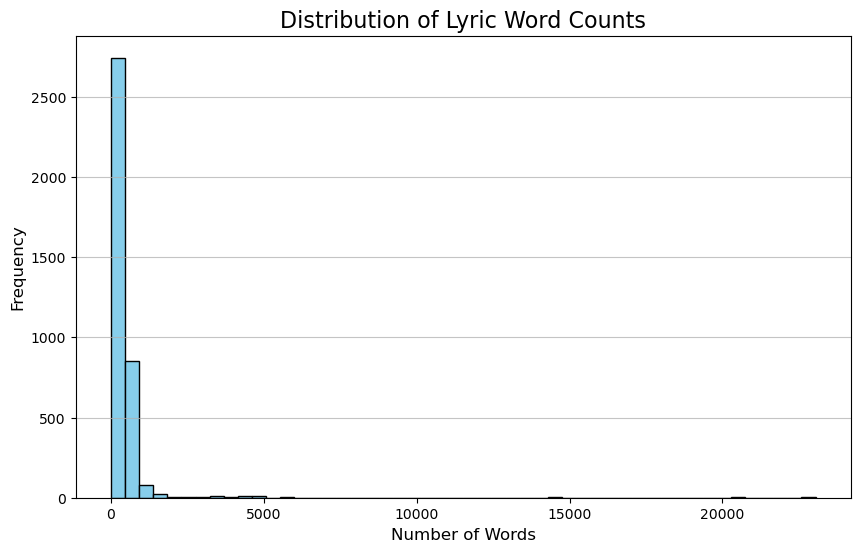

In [22]:
# #find the longest lyrics by plotting length in words as a histogram 
# Calculate the number of words in each lyric entry
lyrics_raw['word_count'] =lyrics_raw['lyrics'].str.split().str.len()

# Plot a histogram of the word counts
plt.figure(figsize=(10, 6))
plt.hist(lyrics_raw['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Lyric Word Counts', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [277]:
#drop anything with less than 5 words and more than 1000 words
original_rows = len(lyrics_raw)
lyrics_raw = lyrics_raw[(lyrics_raw['word_count'] >= 5) & (lyrics_raw['word_count'] <= 800)].reset_index(drop=True)


print(f"Removed {original_rows - len(lyrics_raw)} rows less than 5 or more than 1000.")
print(f"Remaining rows: {len(lyrics_raw)}")

Removed 292 rows less than 5 or more than 1000.
Remaining rows: 3473


#Now we vectorize the data and split into training and testing
#After, test the values using KNN

C:\Users\helen\AppData\Local\Temp\ipykernel_13984\3707942395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lyrics_raw, x='type', palette='plasma')


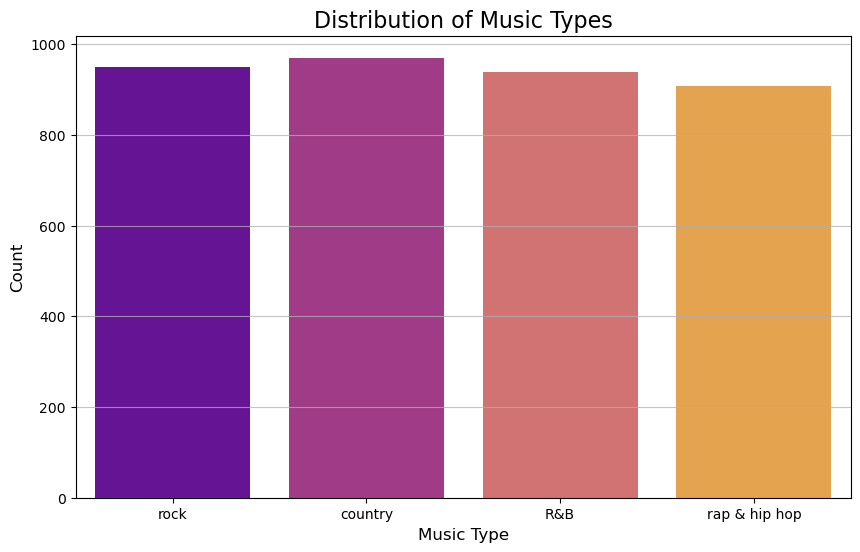

In [25]:
# count the number of rows in each type and plot a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=lyrics_raw, x='type', palette='plasma')
plt.title('Distribution of Music Types', fontsize=16)
plt.xlabel('Music Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [26]:
#Import libraries for KNN and train-test split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# import accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [27]:
lyrics_raw.columns

Index(['song', 'artist', 'type', 'lyrics', 'contains_special_chars',
       'word_count'],
      dtype='object')

In [28]:
#create a new DataFrame for analysis
lyrics_analyze = lyrics_raw[['lyrics', 'type']].copy()
lyrics_analyze['type'] = lyrics_analyze['type'].map({'country': 0, 'rock': 1, 'R&B': 2, 'rap & hip hop': 3})



In [29]:
lyrics_analyze.head()

,lyrics,type
0,There's a lady who's sure all that glitters is...,1
1,Once upon a time you dressed so fine Threw the...,1
2,We don't need no education We don't need no th...,1
3,We'll be fighting in the streets With our chil...,1
4,On a dark desert highway Cool wind in my hair ...,1


In [30]:
#vectorize the lyrics using TF-IDF
# add the max_df and min_df parameters to filter out very common and very rare words
vectorizer = TfidfVectorizer(stop_words='english', max_features=30000, ngram_range=(1, 2),
                              max_df=0.8, min_df=5)
X = vectorizer.fit_transform(lyrics_analyze['lyrics'])
# create the target variable
y = lyrics_analyze['type']

In [31]:
X.shape, y.shape


((3765, 30000), (3765,))

In [32]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# set up the KNN classifier
knn = KNeighborsClassifier(n_neighbors=13,n_jobs=-1, metric='cosine', weights='distance')
# fit the model on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=13,
                     weights='distance')

In [34]:
# test the model on the test data
y_pred = knn.predict(X_test)  
# create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# create a classification report
class_report = classification_report(y_test, y_pred, target_names
                                     =['country', 'rock', 'R&B', 'rap & hip hop'])

In [35]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[ 99  37  40   8]
 [ 37  90  63  18]
 [ 33  34 101  16]
 [ 11  13  12 141]]

Classification Report:
                precision    recall  f1-score   support

      country       0.55      0.54      0.54       184
         rock       0.52      0.43      0.47       208
          R&B       0.47      0.55      0.51       184
rap & hip hop       0.77      0.80      0.78       177

     accuracy                           0.57       753
    macro avg       0.58      0.58      0.58       753
 weighted avg       0.57      0.57      0.57       753



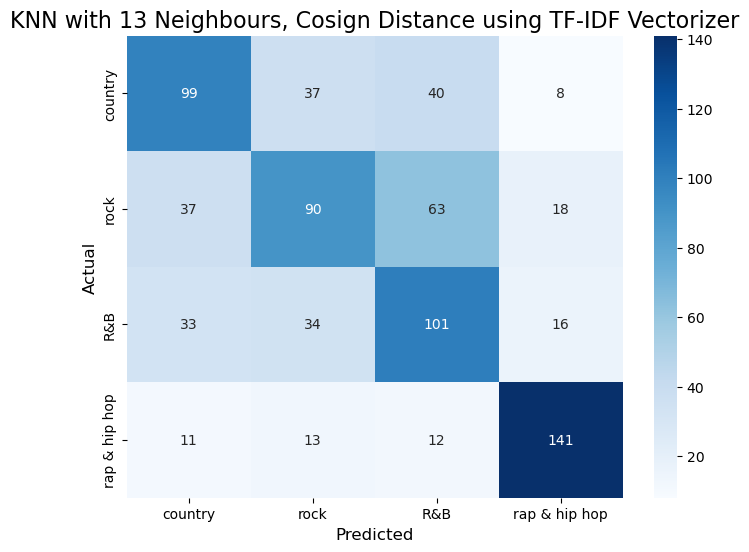

In [47]:
#plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['country', 'rock', 'R&B', 'rap & hip hop'], yticklabels=['country', 'rock', 'R&B', 'rap & hip hop'])
plt.title('KNN with 13 Neighbours, Cosign Distance using TF-IDF Vectorizer', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [36]:
# show a few samples of R&B lyrics
print(lyrics_raw[lyrics_raw['type'] == 'R&B'].sample(5)['lyrics'].values)

["It's a world where I'm never alone It's a world of sheer make-believe Where all young lovers have gone To set their hearts   Doo doo doo doo doo It's a world of fantasy   I go there whenever I feel the need To make life have a new face No-one intrudes upon my privacy To me it's the most wonderful place  Doo doo doo doo doo It's a world of fantasy   Here is where no problems lie And lovers we all become We live with love and never cry 'Cause in love the sum is one plus one  So come on love and follow me To my world  Come my love  Come to my world of fantasy, mm mm yeah  Eee-eeEmbed"
 "Sexy woman   Woman, take me in your arms Rock your baby Woman, take me in your arms Rock your baby   There's nothin' to it Just say you wanna do it Open up your heart And let the lovin' start   Woman, take me in your arms Rock your baby Woman, take me in your arms Rock your baby  Yeah, hold me tight With all your might Now let your lovin' flow Real sweet and slow   Woman, take me in your arms Rock your b

In [37]:
# try a count vectorizer instead of TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
# create a CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_features=30000,ngram_range=(1, 3),     
                                     max_df=0.8, min_df=20)
# fit and transform the lyrics
X_count = count_vectorizer.fit_transform(lyrics_analyze['lyrics'])

In [38]:
X_count.shape

(3765, 4931)

In [39]:
# split the data into training and testing sets
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count,
                                                     y, test_size=0.2, random_state=42)
# set up the KNN classifier
knn_count = KNeighborsClassifier(n_neighbors=15, n_jobs=-1, metric='cosine', weights='distance')
# fit the model on the training data
knn_count.fit(X_train_count, y_train_count)



KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=15,
                     weights='distance')

In [40]:
# create a confusion matrix
conf_matrix_count = confusion_matrix(y_test_count, knn_count.predict(X_test_count))
# create a classification report
class_report_count = classification_report(y_test_count, knn_count.predict(X_test_count),
                                            target_names=['country', 'rock', 'R&B', 'rap & hip hop'])
print("Confusion Matrix (Count Vectorizer):\n", conf_matrix_count)
print("\nClassification Report (Count Vectorizer):\n", class_report_count)

Confusion Matrix (Count Vectorizer):
 [[ 79  28  56  21]
 [ 36  83  75  14]
 [ 23  33 104  24]
 [  7  10  20 140]]

Classification Report (Count Vectorizer):
                precision    recall  f1-score   support

      country       0.54      0.43      0.48       184
         rock       0.54      0.40      0.46       208
          R&B       0.41      0.57      0.47       184
rap & hip hop       0.70      0.79      0.74       177

     accuracy                           0.54       753
    macro avg       0.55      0.55      0.54       753
 weighted avg       0.55      0.54      0.53       753



In [41]:
# for fun and profit - try PCA to reduce the dimensionality of the data
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_train_count.toarray())
# create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2','PCA3', 'PCA4'])
# add the target variable to the DataFrame
pca_df['type'] = y_train_count.values
# plot the PCA results
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='type', palette='Set1', alpha=0.7)

In [42]:
# create KNN classifier on the PCA data
knn_pca = KNeighborsClassifier(n_neighbors=9, n_jobs=-1, metric='cosine', weights='distance')
# fit the model on the PCA data 
knn_pca.fit(X_pca, y_train_count)

KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=9,
                     weights='distance')

In [43]:
# predict on the test data
X_test_pca = pca.transform(X_test_count.toarray())
# create a confusion matrix
conf_matrix_pca = confusion_matrix(y_test_count, knn_pca.predict(X_test_pca))
# create a classification report
class_report_pca = classification_report(y_test_count, knn_pca.predict(X_test_pca),
                                            target_names=['country', 'rock', 'R&B', 'rap & hip hop'])

In [44]:
print("Confusion Matrix (PCA):\n", conf_matrix_pca)
print("\nClassification Report (PCA):\n", class_report_pca)

Confusion Matrix (PCA):
 [[ 91  40  30  23]
 [ 66  85  39  18]
 [ 33  47  65  39]
 [ 22  17  24 114]]

Classification Report (PCA):
                precision    recall  f1-score   support

      country       0.43      0.49      0.46       184
         rock       0.45      0.41      0.43       208
          R&B       0.41      0.35      0.38       184
rap & hip hop       0.59      0.64      0.61       177

     accuracy                           0.47       753
    macro avg       0.47      0.48      0.47       753
 weighted avg       0.47      0.47      0.47       753



In [45]:
#try naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
# set up the Naive Bayes classifier
nb = MultinomialNB()
# fit the model on the training data
nb.fit(X_train_count, y_train_count)
# predict on the test data
y_pred_nb = nb.predict(X_test_count)
# create a confusion matrix
conf_matrix_nb = confusion_matrix(y_test_count, y_pred_nb)
# create a classification report
class_report_nb = classification_report(y_test_count, y_pred_nb,
                                            target_names=['country', 'rock', 'R&B', 'rap & hip hop'])
print("Confusion Matrix (Naive Bayes):\n", conf_matrix_nb)
print("\nClassification Report (Naive Bayes):\n", class_report_nb)

Confusion Matrix (Naive Bayes):
 [[137  25  18   4]
 [ 58  94  50   6]
 [ 31  23 114  16]
 [ 14   6   6 151]]

Classification Report (Naive Bayes):
                precision    recall  f1-score   support

      country       0.57      0.74      0.65       184
         rock       0.64      0.45      0.53       208
          R&B       0.61      0.62      0.61       184
rap & hip hop       0.85      0.85      0.85       177

     accuracy                           0.66       753
    macro avg       0.67      0.67      0.66       753
 weighted avg       0.66      0.66      0.65       753



In [46]:
# and naive bayes on the tf-idf data
nb_tfidf = MultinomialNB()
# fit the model on the training data
nb_tfidf.fit(X_train, y_train)
# predict on the test data  
y_pred_nb_tfidf = nb_tfidf.predict(X_test)
# create a confusion matrix
conf_matrix_nb_tfidf = confusion_matrix(y_test, y_pred_nb_tfidf)
# create a classification report
class_report_nb_tfidf = classification_report(y_test, y_pred_nb_tfidf,
                                            target_names=['country', 'rock', 'R&B', 'rap & hip hop'])
print("Confusion Matrix (Naive Bayes - TF-IDF):\n", conf_matrix_nb_tfidf)
print("\nClassification Report (Naive Bayes - TF-IDF):\n", class_report_nb_tfidf)


Confusion Matrix (Naive Bayes - TF-IDF):
 [[152   6  16  10]
 [ 78  51  53  26]
 [ 30  11 115  28]
 [  4   0   4 169]]

Classification Report (Naive Bayes - TF-IDF):
                precision    recall  f1-score   support

      country       0.58      0.83      0.68       184
         rock       0.75      0.25      0.37       208
          R&B       0.61      0.62      0.62       184
rap & hip hop       0.73      0.95      0.82       177

     accuracy                           0.65       753
    macro avg       0.67      0.66      0.62       753
 weighted avg       0.67      0.65      0.61       753



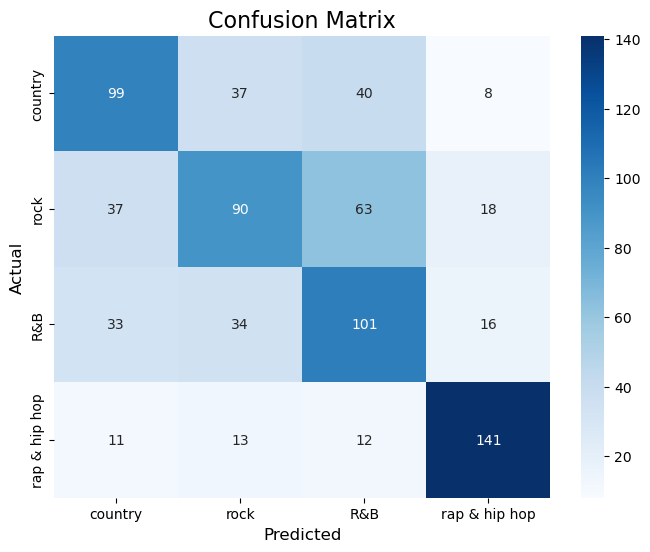

In [48]:
#plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['country', 'rock', 'R&B', 'rap & hip hop'], yticklabels=['country', 'rock', 'R&B', 'rap & hip hop'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()